# Mall_Customer Dataset 분석 & 모델링
- KMeans Modeling
- Dataset 설명
    - 쇼핑몰 고객 정보 dataset

## STEP1. 모듈 & DATASET 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv("./Mall_Customers.csv", index_col=0)

## Step 2. EDA 및 데이터 기초 통계 분석

In [6]:
data.shape

(200, 5)

In [35]:
data.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [37]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [38]:
data = pd.get_dummies(data, columns=['Gender'], drop_first = True)

## STEP2. KMeans Clustering Modeling

In [39]:
from sklearn.cluster import KMeans

In [40]:
model = KMeans(n_clusters=3)

In [41]:
model.fit(data)

KMeans(n_clusters=3)

In [42]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [43]:
result_df = data.copy()

In [44]:
result_df['label'] = model.labels_

In [45]:
result_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,1
2,21,15,81,1,1
3,20,16,6,0,1
4,23,16,77,0,1
5,31,17,40,0,1


In [46]:
# Groupby를 통해 각 클러스트별 통계량을 확인
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.394737,87.000000,18.631579,0.526316
1,40.325203,44.154472,49.829268,0.406504
2,32.692308,86.538462,82.128205,0.461538


In [47]:
# Cluster별 관측치 갯수
result_df['label'].value_counts()

1    123
2     39
0     38
Name: label, dtype: int64

## STEP3. K값 조정하기

### 3-1) Elbow Method
- 최적의 군집 수 구하기 위해서 실행
- Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생김
    - 그 지점의 k값을 군집의 갯수로 사용 
- inertia_ 속성으로 확인할 것!

In [48]:
distance = []
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    distance.append(model.inertia_)


<AxesSubplot:>

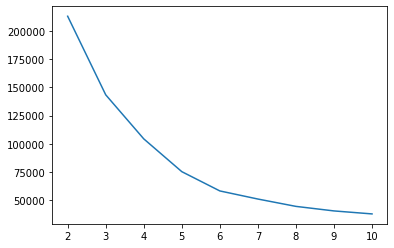

In [49]:
sns.lineplot(x=list(range(2, 11)), y=distance)

### 3-2) Silhoutte Score 
- Elbow Method로 최적 값을 찾기 어려울 때 확인
- 실루엣 점수(군집타당성지표) 이용
- 1에 가까울수록 적절한 군집화가 되어있다고 판단 

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
silhouette_score(data, model.labels_)

0.38615477907479345

In [52]:
sil = []
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))

<AxesSubplot:>

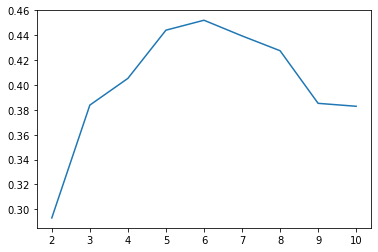

In [53]:
sns.lineplot(x=list(range(2, 11)), y=sil)

In [58]:
model = KMeans(n_clusters=6)
model.fit(data)
data['label'] = model.labels_

In [59]:
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,32.692308,86.538462,82.128205,0.461538
1,25.272727,25.727273,79.363636,0.409091
2,56.155556,53.377778,49.088889,0.444444
3,44.142857,25.142857,19.523810,0.380952
4,41.685714,88.228571,17.285714,0.571429
5,27.000000,56.657895,49.131579,0.342105


<AxesSubplot:xlabel='label', ylabel='Age'>

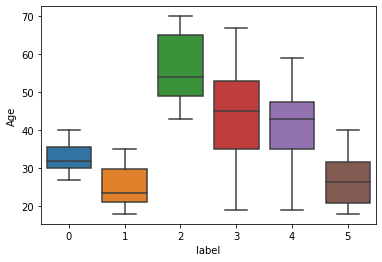

In [60]:
sns.boxplot(x='label', y='Age', data=data)

<AxesSubplot:xlabel='label', ylabel='Annual Income (k$)'>

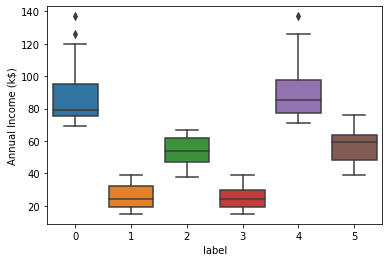

In [61]:
sns.boxplot(x='label', y='Annual Income (k$)', data=data)

## STEP4. PCA를 활용해 변수 줄임 & scatter plot

In [63]:
data.drop('label', axis=1, inplace=True)

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=2)
pca.fit(data)
pca_df = pca.transform(data)

In [ ]:
pca_df

In [67]:
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

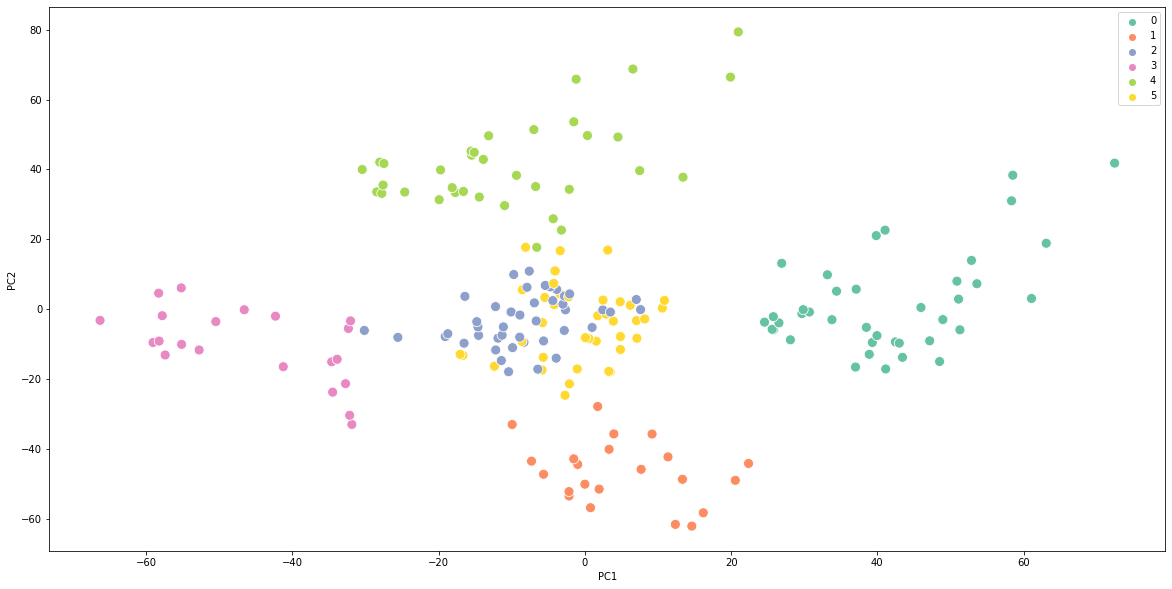

In [68]:
plt.figure(figsize=(20., 10))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=model.labels_, palette='Set2', s=100)